## **Lesson 7** Load Football CSV Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/football.csv")

# **Lesson 8** Data Understanding

*   When and how to rename column




In [12]:
print(df.head())  # Shows the first 5 rows

                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      0  ...     34.0         26.0     17.0   
1            0     0       0      0  ...      0.0          0.0      0.0   
2            0     0       0      0  ...      0.0          0.0      0.0   
3          160    90      37      7  ...      NaN          NaN      NaN   
4           16     7       5      1  ...      NaN          NaN      NaN   

   Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  R

**Accessing a Specific Column**

In [13]:
print(df['Name'])  # Shows the 'Goals' column

0                Bernd Leno
1                Matt Macey
2      Rúnar Alex Rúnarsson
3           Héctor Bellerín
4            Kieran Tierney
               ...         
566              Pedro Neto
567            Raúl Jiménez
568            Adama Traoré
569             Fábio Silva
570        Leonardo Campana
Name: Name, Length: 571, dtype: object


**Renaming a Column**

In [15]:
df.rename(columns={'Name': 'Player Name'}, inplace=True)

**Checking All Column Names**

In [17]:
print(df.columns)

Index(['Player Name', 'Jersey Number', 'Club', 'Position', 'Nationality',
       'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', '

**Lesson 9** Data Slicing

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/football.csv")


Get all Chelsea players

In [19]:
chelsea_players = df[df['Club'] == 'Chelsea']

Get top 5 assist makers

In [ ]:
top_assisters = df.nlargest(5, 'Assists')

Get young players(age <= 21) with high potential

In [ ]:
young_players = df[(df['Age'] <= 21) & (df['Appearences'] > 10)]

Get defensive midfielders with good tackling

In [21]:
defensive_midfielders = df[
    (df['Position'] == 'Midfielder') &
    (df['Tackles'] > df['Tackles'].median())
]

# **Lesson 10** Data cleaning

Identify missing values

In [ ]:
# Calculate missing values count and percentage for each column
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_stats = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})


Scatter Plot: Age vs Goals with Position Differentation

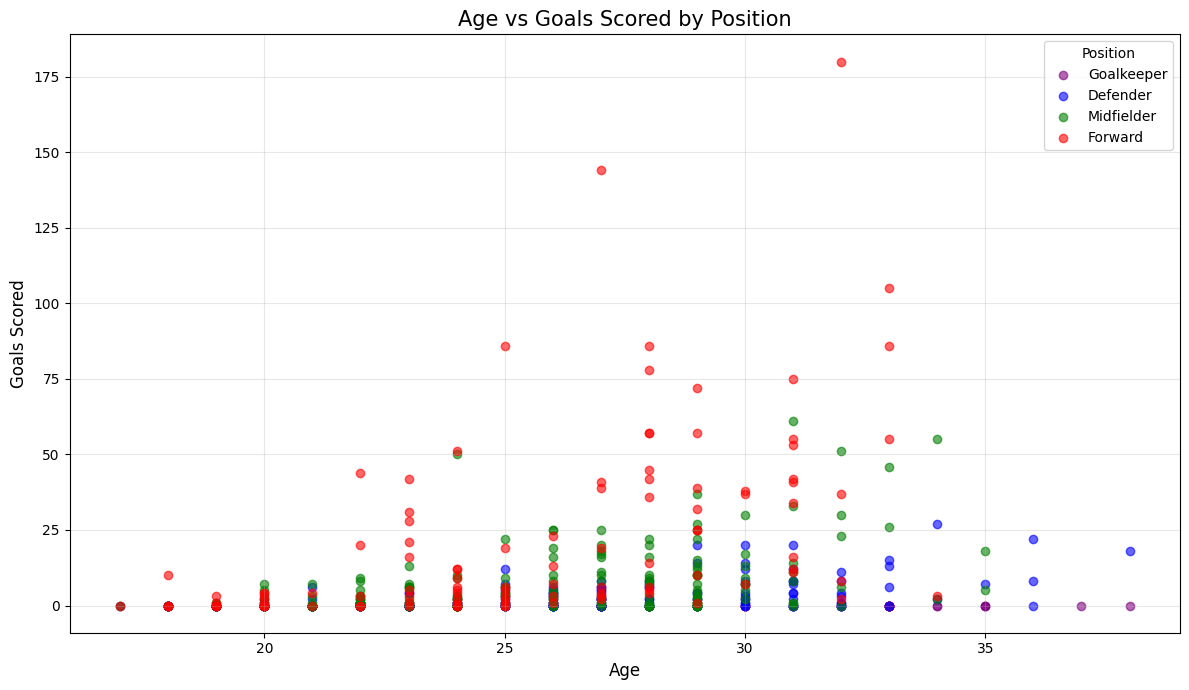

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))  # Only one figure is needed

colors = {
    'Forward': 'red',
    'Midfielder': 'green',
    'Defender': 'blue',
    'Goalkeeper': 'purple'
}

positions = df['Position'].unique()  # Ensure this is defined before the loop

for position in positions:
    if position in colors:
        subset = df[df['Position'] == position]
        plt.scatter(
            subset['Age'],
            subset['Goals'],
            alpha=0.6,
            label=position,
            c=colors[position]
        )

plt.title('Age vs Goals Scored by Position', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)
plt.legend(title='Position')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()





Histogram: Distribution of Player Ages

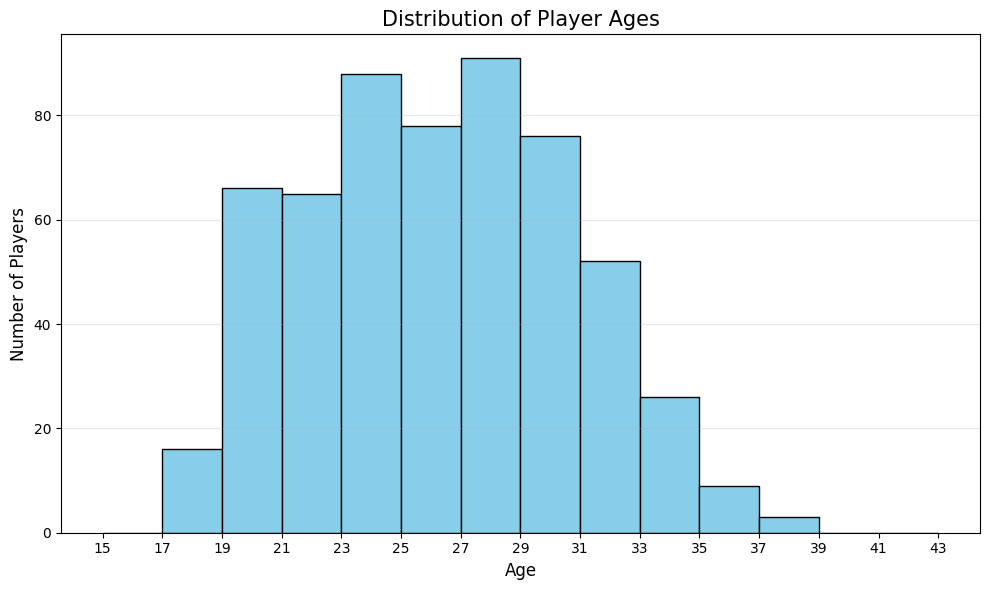

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
bins = np.arange(15, 45, 2)  # Create bins from 15 to 43 (step 2)
plt.hist(df['Age'].dropna(), bins=bins, color='skyblue', edgecolor='black')

plt.title('Distribution of Player Ages', fontsize=15)   # Corrected
plt.xlabel('Age', fontsize=12)                          # Corrected
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(bins)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Pie Chat: Nationality Distribution(Top 10 Countries)

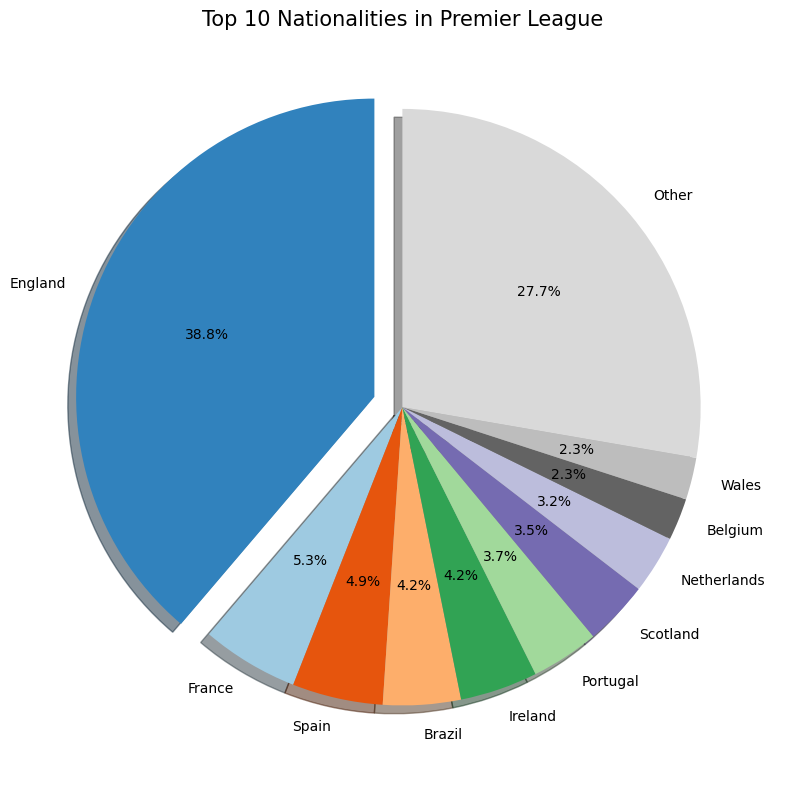

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is already defined and contains a 'Nationality' column
plt.figure(figsize=(10, 8))

# Count nationalities and get top 10
nationality_counts = df['Nationality'].value_counts()
top_nationalities = nationality_counts.head(10)

# Calculate percentages
total_players = nationality_counts.sum()
other_nationalities = total_players - top_nationalities.sum()

# Append 'Other' category safely
top_nationalities = pd.concat([top_nationalities, pd.Series({'Other': other_nationalities})])

# Colors and explode settings
colors = plt.cm.tab20c(np.linspace(0, 1, len(top_nationalities)))
explode = [0.1 if i == 0 else 0 for i in range(len(top_nationalities))]

# Create pie chart
plt.pie(top_nationalities, labels=top_nationalities.index,
        autopct='%1.1f%%', startangle=90, colors=colors,
        explode=explode, shadow=True)

plt.title('Top 10 Nationalities in Premier League', fontsize=15)
plt.tight_layout()
plt.show()

Additional Scatter Plot: Goals vs Assists

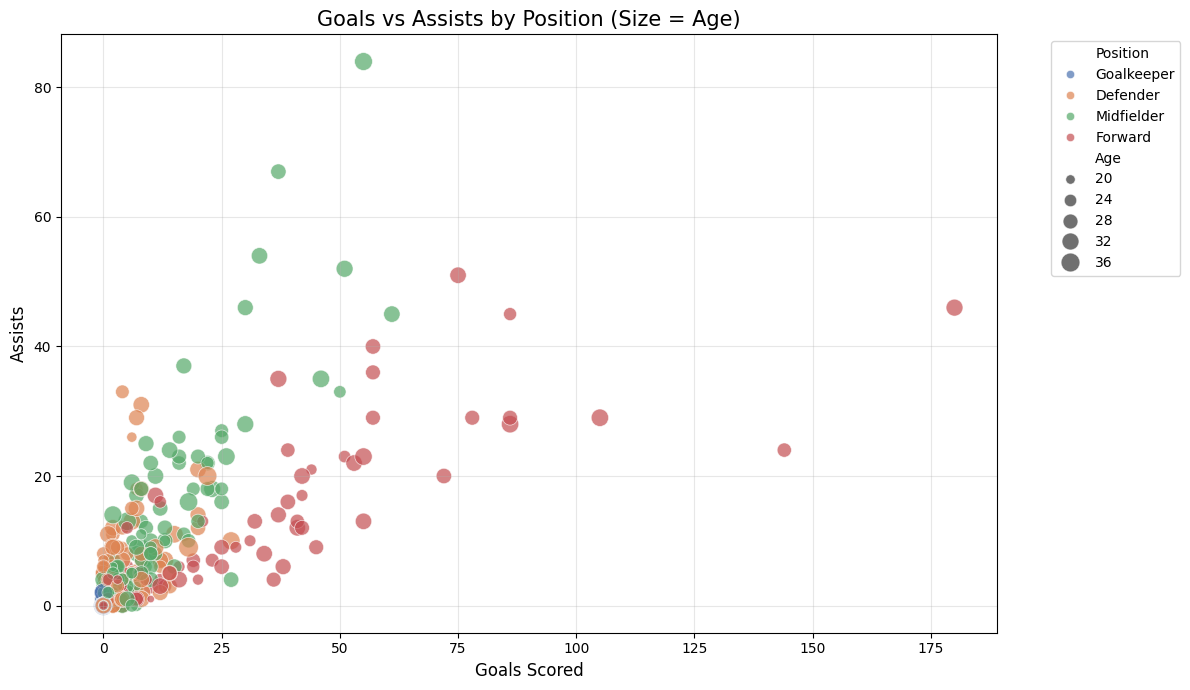

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined and includes 'Goals', 'Assists', 'Position', and 'Age'

plt.figure(figsize=(12, 7))

# Create scatter plot
sns.scatterplot(
    data=df,
    x='Goals',
    y='Assists',
    hue='Position',
    palette='deep',  # or define 'colors' separately if needed
    size='Age',
    sizes=(20, 200),
    alpha=0.7
)

# Titles and labels
plt.title('Goals vs Assists by Position (Size = Age)', fontsize=15)
plt.xlabel('Goals Scored', fontsize=12)
plt.ylabel('Assists', fontsize=12)

# Legend positioning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid and layout
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Lesson 12** *outliers detection and removal

In [ ]:
def detect_and_remove_outliers(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Remove outliers
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return cleaned_df, outliers


# Run the function on 'Goals' column
cleaned_df, outliers = detect_and_remove_outliers(df, 'Goals')

# Display the outliers
print("Outliers detected in 'Goals':")
print(outliers)